In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import  make_moons
from sklearn.metrics import accuracy_score
import mglearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [79]:
X,y = make_moons(n_samples =100, noise =0.25 , random_state =3)

In [16]:
X_train, X_test , y_train ,y_test = train_test_split(X,y ,stratify = y,random_state =42)

In [17]:
forest = RandomForestClassifier(n_estimators = 5 ,random_state =2)

In [18]:
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [20]:
prediction = forest.predict(X_test)
prediction

array([1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1], dtype=int64)

In [22]:
print(accuracy_score(y_test , prediction))

0.92


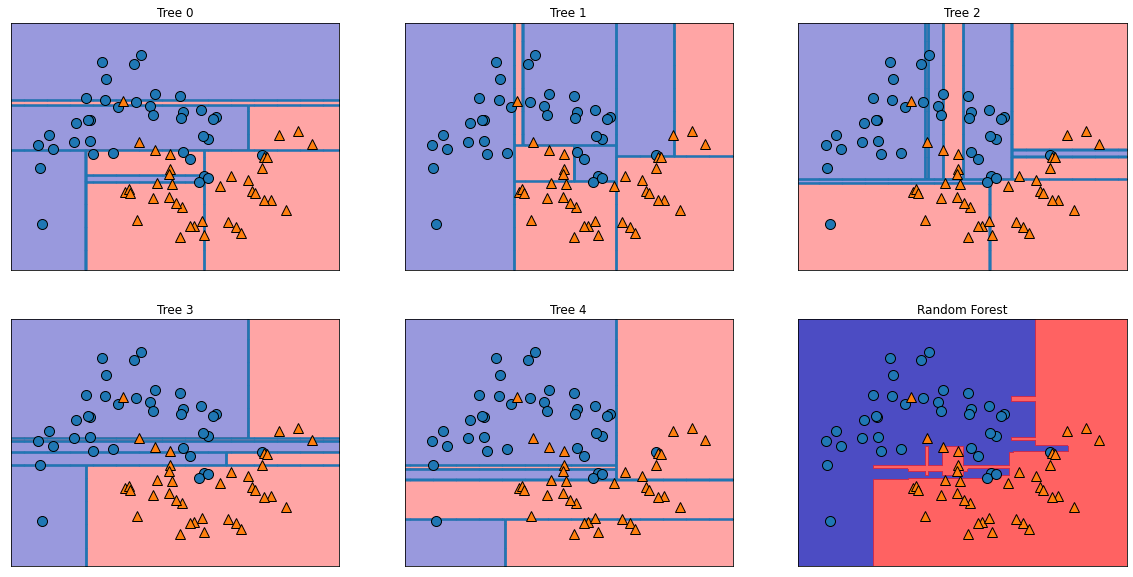

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
         ax.set_title("Tree {}".format(i))
         mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.7)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)


### 2. Cancer Dataset

In [34]:
from sklearn.datasets import  load_breast_cancer
cancer = load_breast_cancer()


In [35]:
X_train, X_test ,y_train ,y_tes = train_test_split(cancer.data, cancer.target, random_state=0)

In [50]:
forest = RandomForestClassifier(n_estimators =100,random_state =0)

In [51]:
forest.fit(X_train ,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [63]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))


Accuracy on training set: 1.000


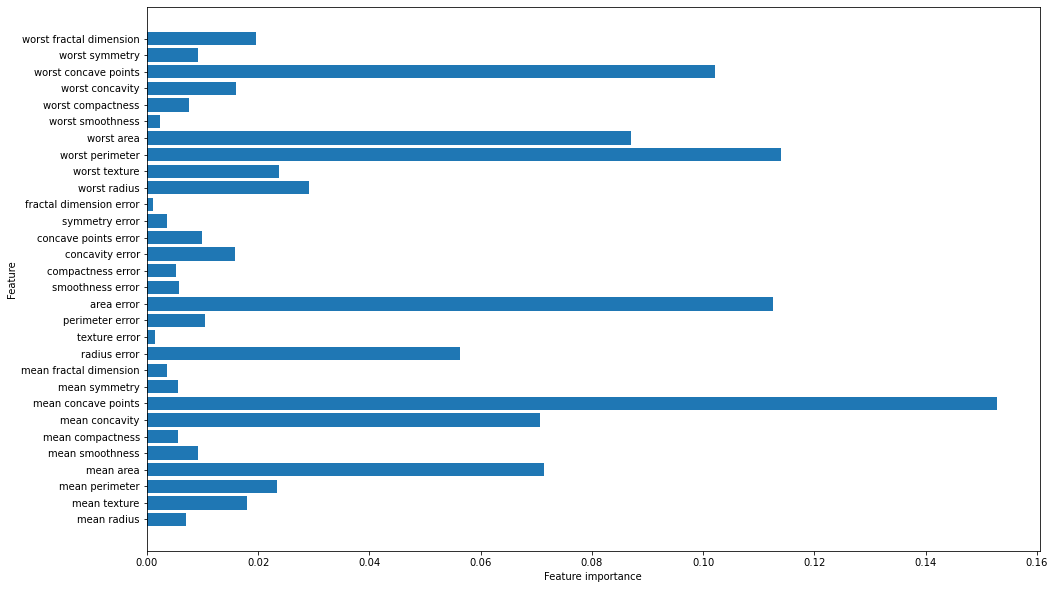

In [85]:
plt.figure(figsize =(16,10))
plot_feature_importances_cancer(forest)

### Gradient Boosted Regression Trees

In [64]:
## sample data from cancer

# import lib
from sklearn.ensemble import GradientBoostingClassifier

In [65]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [66]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(random_state=0)

In [67]:
gbrt.score()

<bound method ClassifierMixin.score of GradientBoostingClassifier(random_state=0)>

In [68]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 1.000
Accuracy on test set: 0.965


###### As the training set accuracy is 100%, we are likely to be overfitting. To reduce overfit‐ting, we could either apply stronger pre-pruning by limiting the maximum depth or lower the learning rate:

In [69]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=1, random_state=0)

In [70]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [72]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.01, random_state=0)

In [73]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))


Accuracy on training set: 0.988
Accuracy on test set: 0.965


In [75]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=1, random_state=0)

#### making a function to plot the feature of cancer

In [80]:
def plot_feature_importances_cancer(model):
        n_features = cancer.data.shape[1]
        plt.barh(range(n_features), model.feature_importances_, align='center')
        plt.yticks(np.arange(n_features), cancer.feature_names)
        plt.xlabel("Feature importance")
        plt.ylabel("Feature")


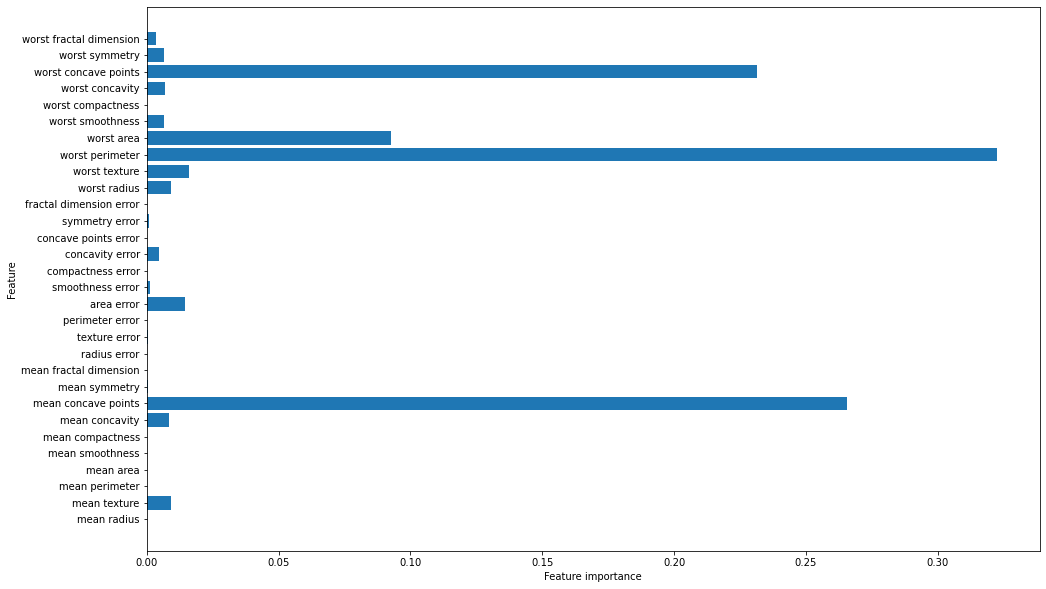

In [84]:
plt.figure(figsize =(16,10))
plot_feature_importances_cancer(gbrt)

Text(0, 0.5, 'Feature 1')

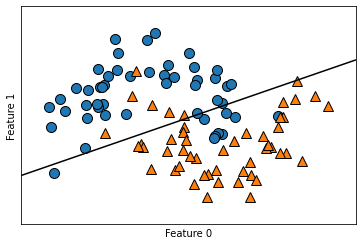

In [86]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


C:\Users\91808\AppData\Local\Temp/ipykernel_3576/1632697986.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature1 ** 2')

<Figure size 1152x720 with 0 Axes>

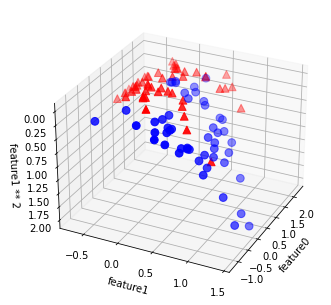

In [92]:
#plt.figure(figsize =(16,10))
# add the squared first feature
X_new = np.hstack([X, X[:, 1:] ** 2])
from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y == 0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\91808\AppData\Local\Temp/ipykernel_3576/3495188939.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(figure, elev=-152, azim=-26)


Text(0.5, 0, 'feature0 ** 2')

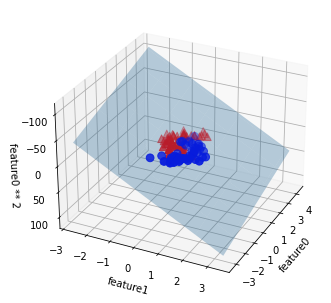

In [93]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
 cmap=mglearn.cm2, s=60)
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
 cmap=mglearn.cm2, s=60)
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature0 ** 2")


Text(0, 0.5, 'Feature 1')

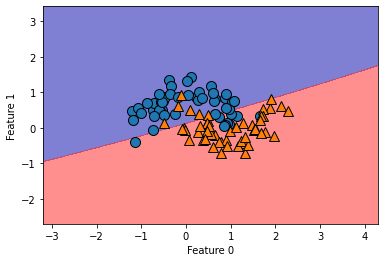

In [94]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
 cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

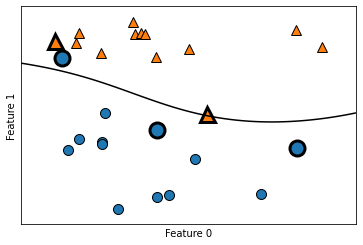

In [95]:
from sklearn.svm import SVC
X, y = mglearn.tools.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")


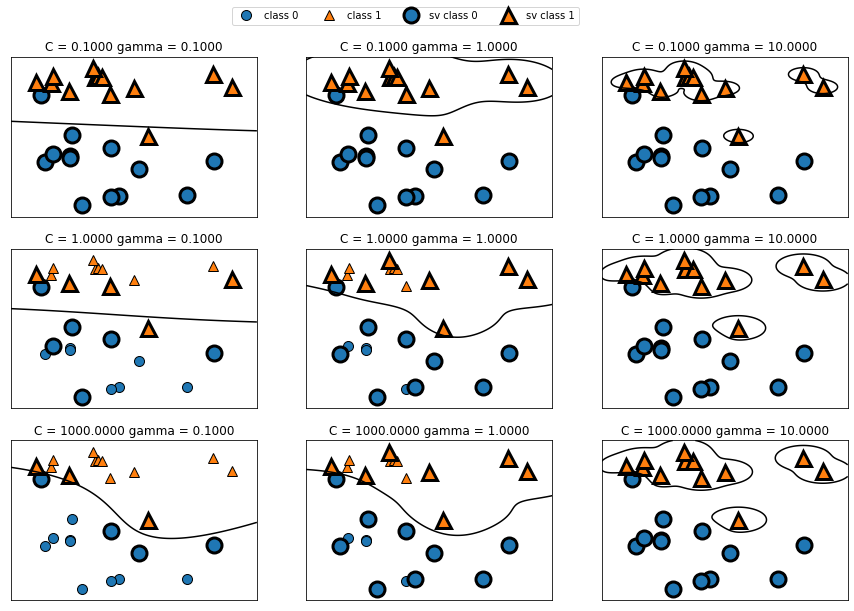

In [96]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"], ncol=4, loc=(.9, 1.2))


#### RBF Karnel of svm to breast cancer dataset

In [105]:
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state= 49)
svc = SVC()
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.92
Accuracy on test set: 0.90


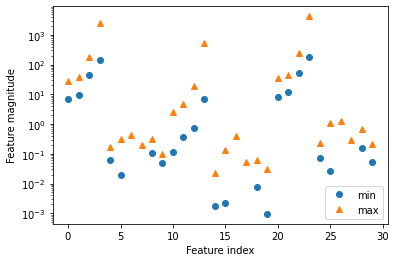

In [106]:
plt.plot(X_train.min(axis=0), 'o', label="min")
plt.plot(X_train.max(axis=0), '^', label="max")
plt.legend(loc=4)
plt.xlabel("Feature index")
plt.ylabel("Feature magnitude")
plt.yscale("log")


In [108]:
svc = SVC(C=1000)
svc.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(svc.score(X_test, y_test)))


Accuracy on training set: 0.953
Accuracy on test set: 0.944


####  hyperbolic tangent activation function and the rectified linear activation function

Text(0, 0.5, 'relu(x), tanh(x)')

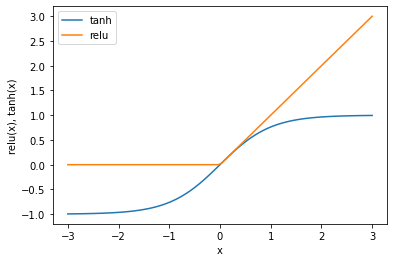

In [112]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")


In [6]:
from sklearn.ensemble import RandomForestClassifier